In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
human_data = pd.read_csv('human_data.txt', sep='\t')     # pd.read_table     # Human data
human_data.head()

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


We have some data for human DNA sequence coding regions and a class label.
We also have data for Chimpanzee and a more divergent species, the dog.

dataset can be downloaded from here : 
https://www.kaggle.com/thomasnelson/humandata/downloads/human_data.txt
https://www.kaggle.com/thomasnelson/humandata/downloads/chimp_data.txt
https://www.kaggle.com/thomasnelson/humandata/downloads/dog_data.txt

In [16]:
chimp_data = pd.read_csv('chimp_data.txt', sep='\t')   # Chimpanzee DNA Sequence data
dog_data = pd.read_csv('dog_data.txt', sep='\t')      # Dog DNA sequence data

Here are the definitions for each of the 7 classes and how many there are in the human training data.
They are gene sequence function groups.

<img src='sequnce1.png'>

### Whenever we are working with DNA Sequence, Transcriptions we basically convert these as languages, in order to convert these into languages we use this, 'k-mer counting' technique. 

In [ ]:
Treating DNA sequence as a "language", otherwise known as k-mer counting

A challenge that remains is that none of these above methods results in vectors of uniform length, and that is a requirement 
for feeding data to a classification or regression algorithm. So with the above methods you have to resort to things like 
truncating sequences or padding with "n" or "0" to get vectors of uniform length.

DNA and protein sequences can be viewed metaphorically as the language of life. The language encodes instructions as well as
function for the molecules that are found in all life forms. The sequence language analogy continues with the genome as the
book, subsequences (genes and gene families) are sentences and chapters, k-mers and peptides (motifs) are words, and 
nucleotide bases and amino acids are the alphabet. Since the analogy seems so apt, it stands to reason that the amazing work 
done in the natural language processing field should also apply to the natural language of DNA and protein sequences.

****The method used here is simple and easy. first take the long biological sequence and break it down into k-mer length 
overlapping “words”.
For example, if I use "words" of length 6 (hexamers), “ATGCATGCA” becomes: ‘ATGCAT’, ‘TGCATG’, ‘GCATGC’, ‘CATGCA’. 
Hence our example sequence is broken down into 4 hexamer words.

Here using hexamer 'words' but that is arbitrary and word length can be tuned to suit the particular situation. 
The word length and amount of overlap need to be determined empirically for any given application.
In genomics, we refer to these types of manipulations as "k-mer counting", or counting the occurances of each possible 
k-mer sequence. There are specialized tools for this, but the Python natural language processing tools make it supe easy.
Here is a function that can be used to convert any sequence (string) to overlapping k-mer words:

Here is the article link : https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0206409

##### Once they convert this type of sequence into a fixed length of sequences, then they will try to apply -> Bag of Word (or TF-IDF) and convert this into fix set of vectors.

### Let's define a function to collect all possible overlapping k-mers of a specified length from any sequence string. We will basically apply the k-mers to the complete sequences.

In [17]:
# function to convert sequence strings into k-mer words, default size = 6 (hexamer words)
def getKmers(sequence, size=6):     # converting this 'sequence' into this size=6
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]

### Now we can convert our training data sequences into short overlapping k-mers of legth 6. Lets do that for each species of data we have using our getKmers function.

In [20]:
human_data['words'] = human_data.apply(lambda x: getKmers(x['sequence']), axis=1)
human_data = human_data.drop('sequence', axis=1)    # after converting into sequence into k-mers, dropping 'sequence' column 

chimp_data['words'] = chimp_data.apply(lambda x: getKmers(x['sequence']), axis=1)      # similarly for 'chimpanzee' data
chimp_data = chimp_data.drop('sequence', axis=1)

dog_data['words'] = dog_data.apply(lambda x: getKmers(x['sequence']), axis=1)   # also for 'dog' data
dog_data = dog_data.drop('sequence', axis=1)


## Now, our coding sequence data is changed to lowercase, split up into all possible k-mer words of length 6 and ready for the next step.

In [24]:
human_data.head()

,class,words
0,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
3,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
4,3,"[atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc..."



### Since we are going to use scikit-learn natural language processing tools to do the k-mer counting, we need to now convert the lists of k-mers for each gene into string sentences of words that the count vectorizer can use. We can also make a y variable to hold the class labels. 

In [27]:
human_texts = list(human_data['words'])

for item in range(len(human_texts)):
    human_texts[item] = ' '.join(human_texts[item])      # 'human_texts' - input data 
    
y_data = human_data.iloc[:, 0].values       # output 'class' data

In [29]:
print(human_texts[0])

atgccc tgcccc gcccca ccccaa cccaac ccaact caacta aactaa actaaa ctaaat taaata aaatac aatact atacta tactac actacc ctaccg taccgt accgta ccgtat cgtatg gtatgg tatggc atggcc tggccc ggccca gcccac cccacc ccacca caccat accata ccataa cataat ataatt taatta aattac attacc ttaccc tacccc accccc ccccca ccccat cccata ccatac catact atactc tactcc actcct ctcctt tcctta ccttac cttaca ttacac tacact acacta cactat actatt ctattc tattcc attcct ttcctc tcctca cctcat ctcatc tcatca catcac atcacc tcaccc caccca acccaa cccaac ccaact caacta aactaa actaaa ctaaaa taaaaa aaaaat aaaata aaatat aatatt atatta tattaa attaaa ttaaac taaaca aaacac aacaca acacaa cacaaa acaaac caaact aaacta aactac actacc ctacca taccac accacc ccacct caccta acctac cctacc ctacct tacctc acctcc cctccc ctccct tccctc ccctca cctcac ctcacc tcacca caccaa accaaa ccaaag caaagc aaagcc aagccc agccca gcccat cccata ccataa cataaa ataaaa taaaaa aaaaat aaaata aaataa aataaa ataaaa taaaaa aaaaaa aaaaat aaaatt aaatta aattat attata ttataa tataac ataaca taacaa aacaaa acaaac

In [30]:
y_data

array([4, 4, 3, ..., 6, 6, 6], dtype=int64)

## Same for Chimpanzee and Dog dataset 

In [31]:
chimp_texts = list(chimp_data['words'])
for item in range(len(chimp_texts)):
    chimp_texts[item] = ' '.join(chimp_texts[item])         # input
y_chimp = chimp_data.iloc[:, 0].values                       # output 

dog_texts = list(dog_data['words'])
for item in range(len(dog_texts)):
    dog_texts[item] = ' '.join(dog_texts[item])     # input
y_dog = dog_data.iloc[:, 0].values                 # output

## Now Applying the BAG of WORDS using CountVectorizer using NLP

In [32]:
# Creating the Bag of Words model using CountVectorizer()
# This is equivalent to k-mer counting
# The n-gram size of 4 was previously determined by testing

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(ngram_range=(4,4))
X = cv.fit_transform(human_texts)

X_chimp = cv.transform(chimp_texts)
X_dog = cv.transform(dog_texts)

In [33]:
print(X.shape)              # It has many columns Bcoz each vector converted into columns.  
print(X_chimp.shape)
print(X_dog.shape)

(4380, 232414)
(1682, 232414)
(820, 232414)


### If we have a look at class balance we can see we have relatively balanced dataset.

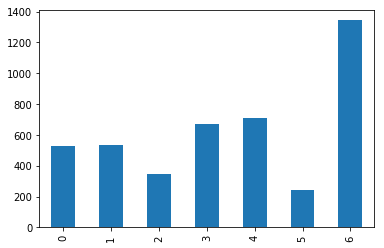

In [38]:
human_data['class'].value_counts().sort_index().plot.bar()

## Split tha dataset : train-test

In [39]:
# Splitting the human dataset into the training set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_data, test_size = 0.20, random_state=42)

In [40]:
print(X_train.shape)
print(X_test.shape)

(3504, 232414)
(876, 232414)


## Naive Bayes Classifier

In [41]:
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB(alpha=0.1)

classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [42]:
y_pred = classifier.predict(X_test)

### Check Accuracy

In [43]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

print("Confusion matrix : \n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))

Confusion matrix : 

Predicted   0    1   2    3    4   5    6
Actual                                   
0          99    0   0    0    1   0    2
1           0  104   0    0    0   0    2
2           0    0  78    0    0   0    0
3           0    0   0  124    0   0    1
4           1    0   0    0  143   0    5
5           0    0   0    0    0  51    0
6           1    0   0    1    0   0  263


In [45]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy Score is : {accuracy:0.2%} \n')
print(f'Precision is : {precision:0.2%} \n')
print(f'Recall is : {recall:0.2%} \n')
print(f'f1_Score is : {f1:0.2%}')

Accuracy Score is : 98.40% 

Precision is : 98.43% 

Recall is : 98.40% 

f1_Score is : 98.40%
